## Scaling to median and quantiles

We saw in previous lectures that the magnitude of the variables affects different machine learning algorithms for different reasons. In this section, I will cover a few standard ways of squeezing the magnitude of the variables.


Scaling using median and quantiles consists of substracting the median to all the observations, and then dividing by the interquantile difference. The interquantile difference is the difference between the 75th and 25th quantile:

IQR = 75th quantile - 25th quantile

X_scaled = (X - X.median) / IQR

For an overview of the different scaling methods check:
http://scikit-learn.org/stable/auto_examples/preprocessing/plot_all_scaling.html#sphx-glr-auto-examples-preprocessing-plot-all-scaling-py


Let's demonstrate the Median and Quantile scaling method using scikit-learn. The function of sklearn to perform this procedure is the RobustScaler

In [1]:
import pandas as pd
import numpy as np

# RobustScaler from sklearn performs the above described operation
from sklearn.preprocessing import RobustScaler

from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
% matplotlib inline

In [2]:
# load the numerical variables of the Titanic Dataset
data = pd.read_csv('titanic.csv', usecols = ['Pclass', 'Age', 'Fare', 'Survived'])
data.head()

,Survived,Pclass,Age,Fare
0,0,3,22.0,7.2500
1,1,1,38.0,71.2833
2,1,3,26.0,7.9250
3,1,1,35.0,53.1000
4,0,3,35.0,8.0500


In [3]:
# let's have a look at the values of those variables to get an idea of the magnitudes
data.describe()

,Survived,Pclass,Age,Fare
count,891.000000,891.000000,714.000000,891.000000
mean,0.383838,2.308642,29.699118,32.204208
std,0.486592,0.836071,14.526497,49.693429
min,0.000000,1.000000,0.420000,0.000000
25%,0.000000,2.000000,20.125000,7.910400
50%,0.000000,3.000000,28.000000,14.454200
75%,1.000000,3.000000,38.000000,31.000000
max,1.000000,3.000000,80.000000,512.329200


We can see from the above statistics table that the magnitudes of the variables are different. The mean values and medians are different as well as the maximum values and the range over which the values are spread.

In [4]:
# let's check at missing  data

data.isnull().sum()

Survived      0
Pclass        0
Age         177
Fare          0
dtype: int64

Age contains missing information, so I will fill those observations with the median in the next cell.

In [5]:
# let's separate into training and testing set
X_train, X_test, y_train, y_test = train_test_split(data[['Pclass', 'Age', 'Fare']],
                                                    data.Survived, test_size=0.3,
                                                    random_state=0)
X_train.shape, X_test.shape

((623, 3), (268, 3))

In [6]:
# let's fill the missing data

X_train.Age.fillna(X_train.Age.median(), inplace=True)
X_test.Age.fillna(X_train.Age.median(), inplace=True)

### Robust Scaler

In [7]:
# robust scaler

scaler = RobustScaler() # call the object
X_train_scaled = scaler.fit_transform(X_train) # fit the scaler to the train set, and then scale it
X_test_scaled = scaler.transform(X_test) # scale the test set

In [8]:
#let's have a look at the scaled training dataset

print('means (Pclass, Age and Fare): ', X_train_scaled.mean(axis=0))
print('std (Pclass, Age and Fare): ', X_train_scaled.std(axis=0))

means (Pclass, Age and Fare):  [-0.47512039  0.0567354   0.7440926 ]
std (Pclass, Age and Fare):  [ 0.55998791  1.00109914  2.05514812]


As you can see, the distributions are not centered in zero and the standard deviation is not 1 as when normalising the data.

In [9]:
# let's look at the new minimum and maximum values

print('Min values (Pclass, Age and Fare): ', X_train_scaled.min(axis=0))
print('Max values (Pclass, Age and Fare): ', X_train_scaled.max(axis=0))

Min values (Pclass, Age and Fare):  [-1.33333333 -2.17923077 -0.63931806]
Max values (Pclass, Age and Fare):  [  0.           3.92307692  21.19676931]


Neither are the minimum and maximum values set to a certain upper and lower boundaries like in the MinMaxScaler

(array([  30.,   10.,   10.,   19.,   52.,   67.,   56.,  183.,   56.,
          34.,   28.,   25.,   18.,   10.,   10.,    7.,    3.,    3.,
           1.,    1.]),
 array([-2.17923077, -1.87411538, -1.569     , -1.26388462, -0.95876923,
        -0.65365385, -0.34853846, -0.04342308,  0.26169231,  0.56680769,
         0.87192308,  1.17703846,  1.48215385,  1.78726923,  2.09238462,
         2.3975    ,  2.70261538,  3.00773077,  3.31284615,  3.61796154,
         3.92307692]),
 <a list of 20 Patch objects>)

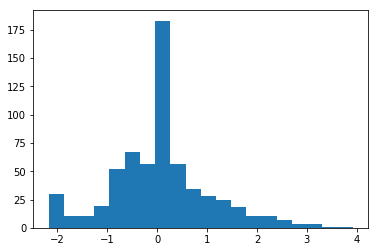

In [10]:
# let's look at the distribution of Age transformed

plt.hist(X_train_scaled[:,1], bins=20)

(array([ 388.,  118.,   54.,   27.,   10.,   12.,    1.,    0.,    7.,
           1.,    3.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    2.]),
 array([ -0.63931806,   0.45248631,   1.54429068,   2.63609505,
          3.72789941,   4.81970378,   5.91150815,   7.00331252,
          8.09511689,   9.18692126,  10.27872563,  11.37052999,
         12.46233436,  13.55413873,  14.6459431 ,  15.73774747,
         16.82955184,  17.92135621,  19.01316058,  20.10496494,  21.19676931]),
 <a list of 20 Patch objects>)

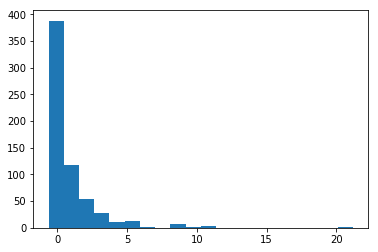

In [11]:
# let's look at the distribution of Fare transformed

plt.hist(X_train_scaled[:,2], bins=20)

The variable Age has a somewhat normal distribution after the transformation, reflecting the approximately Gaussian distribution that shows the original variable. Fare on the other had shows a skewed distribution, which is also evidenced after variable transformation in the previous plot.

In [12]:
import seaborn as sns

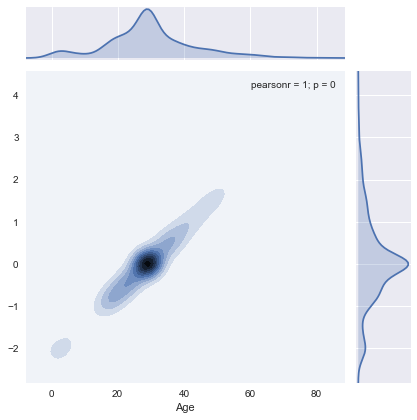

In [13]:
# let's look at how transformed age looks like compared to the original variable

sns.jointplot(X_train.Age, X_train_scaled[:,1], kind='kde')

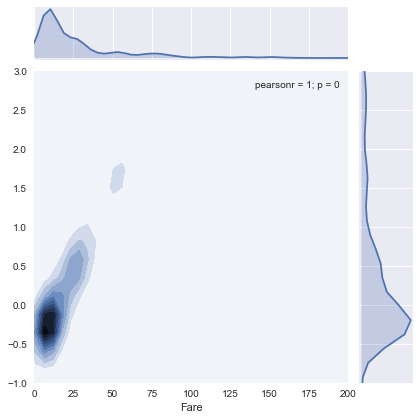

In [14]:
# let's look at how transformed Fare looks like compared to the original variable

sns.jointplot(X_train.Fare, X_train_scaled[:,2], kind='kde', xlim=(0,200), ylim=(-1,3))

As we can see, The robust scaler does a better job at preserving the spread of the variable after transformation for skewed variables like Fare (compare with the standard scaler or the MinMaxScaler)

### Conclusions

Typically, at the time of setting the features within a similar scale for Machine Learning, standarisation is the normalisation method of choice. And this is done without taking into account the distribution of the variable.

However, we have seen in the past 3 lectures that the different normalisation methods have different advantages and disadvantages, and when the distribution of the variable is skewed, perhaps it is better to scale using the mean and quantiles method, which is more robust to the presence of outliers.